# VaatiVidya Channel Analysis

![alt text](banner.png "Title")

VaatiVidya is a gaming youtuber who makes videos on games developed by Fromsoftware, a videogame development studio known to develop challenging AAA videogames, their IPs such as Darksouls and Bloodborn are considered some of the best games ever developed, winning them various gaming awards. Fromsoft has a tendency to hide major section of their games' story from the player and expects them to interprete the story in their own way by giving hints to the story by means of item decriptions and environmental story telling. VaatiVidya finds these hidden details and makes videos explaining hidden details and lore of the game.

### Data Collection using YouTube Data API

We will be using YouTube Data API to extract relevent of every video of the channel like Video title, video id, likes and
dislikes on each video

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from apiclient.discovery import build
import matplotlib.patches as mpatches
from matplotlib.image import imread
from matplotlib.offsetbox import AnnotationBbox , OffsetImage

### Getting Your API Key

We need to generate an API key before we can use the Data API. The key can be generated using this link:https://console.cloud.google.com/

In [2]:
key=                                          # paste your API key here in quotes
channel_id='UCe0DNp0mKMqrYVaTundyr9w'         # unique channel if for VaatiVidya channel

### Getting the Data
We will now use the API to extract data from the channel

In [3]:
youtube=build('youtube','v3',developerKey=key)

Every youtube channel has a default playlist called "Uploads" where every video of channel is present. We will use this playlist to extract the details of every video like Video title, description and video id. The response of the API is in JSON format from which data can be extracted since its format is very similar to a python dictonary

In [4]:
# Function to get video details into a list
def videodetails(channel_id):
    res=youtube.channels().list(part='contentDetails',id=channel_id).execute()
    pl_id=res['items'][0]['contentDetails']['relatedPlaylists']['uploads']
    np_token=None
    videos=[]
    while 1 :
        res_videos=youtube.playlistItems().list(part='snippet',playlistId=pl_id,pageToken=np_token,maxResults=50).execute()
        videos+=res_videos['items']
        
        # use try except, since last item will not contain pageToken key
        try:
            np_token=res_videos['nextPageToken']
        except KeyError:
            np_token=None
        if np_token==None:
            break
        
    return videos
    

In [5]:
videos=videodetails(channel_id)

Below is shown how to access information of videos, including video title, description, video id and thumbnails , 0 index will give details of most recent upload.

In [6]:
videos[0]

{'kind': 'youtube#playlistItem',
 'etag': 'br8tlb46otpTJ9FLwX-6Me4pAFo',
 'id': 'VVVlMEROcDBtS01xcllWYVR1bmR5cjl3LjdCb25ZZjNlNUs0',
 'snippet': {'publishedAt': '2021-12-02T18:28:22Z',
  'channelId': 'UCe0DNp0mKMqrYVaTundyr9w',
  'title': 'A Desperate Final Playthrough of Elden Ring',
  'description': "Watch the previous Playthrough episode: https://youtu.be/R9DWTt37khU\n►Early access to the ER lore content will likely go up here in coming weeks: https://www.patreon.com/vaatividya\n►Clothing Merch at https://vaatividya.com/\n►My Displate Metal Prints at https://bit.ly/3kDjpF4\n\nTIMESTAMPS\n00:00 Limgrave\n04:21 Limgrave Tunnels\n10:10 Gateside Ruins\n15:21 Dissenter's Cave\n17:48 Exploring Limgrave\n23:16 Margit Attempts\n\nKINDLE THE CHANNEL [become a patron]\n►http://www.patreon.com/vaatividya\n\nSPECIAL THANKS TO\n►/u/SaidTheEmu for the meme at the start of the video, I laughed - https://www.reddit.com/r/Eldenring/comments/qvdd61/need_to_hold_us_over_until_february/\n►/u/why1758 for

In [7]:
# Creating dataframe to store title and video id

df=pd.DataFrame(columns=['Title','Video_id'])

In [8]:
df

,Title,Video_id


In [9]:
title=[]
ids=[]
for video in range(0,len(videos)):
    title.append(videos[video]['snippet']['title'])
    ids.append(videos[video]['snippet']['resourceId']['videoId'])
    

In [10]:
df['Title']=title
df['Video_id']=ids

In [11]:
#Using video id from dataframe to extract more information such as like, dislike, views, comment counts
like=[]
dislike=[]
view_count=[]
comment_count=[]
for i in range (0,len(df)):
    res=youtube.videos().list(part='statistics',id=df['Video_id'][i]).execute()
    like.append(res['items'][0]['statistics']['likeCount'])
    dislike.append(res['items'][0]['statistics']['dislikeCount'])
    view_count.append(res['items'][0]['statistics']['viewCount'])
    comment_count.append(res['items'][0]['statistics']['commentCount'])
df['like']=like
df['dislike']=dislike
df['views']=view_count
df['comments']=comment_count

In [12]:
df

,Title,Video_id,like,dislike,views,comments
0,A Desperate Final Playthrough of Elden Ring,7BonYf3e5K4,33568,518,773049,2163
1,10 Things You Should Know Before Playing Elden...,KD8I0ZvuR9o,35102,491,760957,2111
2,The Best Parts of Elden Ring's Network Test!,Z-IK5Q_nYF0,31199,347,763354,2067
3,A Magical First Playthrough of Elden Ring,R9DWTt37khU,103214,1767,3047577,10132
4,Revealing the Glorious World of ELDEN RING,fciP89-aDqE,46538,729,825484,4279
...,...,...,...,...,...,...
293,Dark Souls Story ► Siegmeyer of Catarina,cdliu3JOSYQ,58616,393,2443072,4182
294,Dark Souls Story ► The Sisters of Chaos,eRbZVx6SuOE,30875,243,1798096,2707
295,Knight Artorias - Cut Dialogue,upzLAJhtnvk,24631,97,998495,2691
296,Dark Souls Story ► The Legend of Artorias the ...,6d82kJlb5Us,55887,351,2901330,5139


### Extracting Video Game title from video title

In [13]:
 cleaned_title=[]
for i in range(0,len(df)):
     cleaned_title.append("".join(filter(str.isalnum,df['Title'][i].lower())))

In [14]:
df['cleaned title']=cleaned_title

In [15]:
df.head()

,Title,Video_id,like,dislike,views,comments,cleaned title
0,A Desperate Final Playthrough of Elden Ring,7BonYf3e5K4,33568,518,773049,2163,adesperatefinalplaythroughofeldenring
1,10 Things You Should Know Before Playing Elden...,KD8I0ZvuR9o,35102,491,760957,2111,10thingsyoushouldknowbeforeplayingeldenring
2,The Best Parts of Elden Ring's Network Test!,Z-IK5Q_nYF0,31199,347,763354,2067,thebestpartsofeldenringsnetworktest
3,A Magical First Playthrough of Elden Ring,R9DWTt37khU,103214,1767,3047577,10132,amagicalfirstplaythroughofeldenring
4,Revealing the Glorious World of ELDEN RING,fciP89-aDqE,46538,729,825484,4279,revealingthegloriousworldofeldenring


In [16]:
df['like']=df['like'].astype(int)
df['dislike']=df['dislike'].astype(int)
df['comments']=df['comments'].astype(int)
df['views']=df['views'].astype(int)

### Creating a feature that will classify every video with their respective games:

In [17]:
Game=[]
for i in range (0,len(df)):
    if 'eldenring' in df['cleaned title'][i]:
        Game.append('Elden Ring')
    elif 'darksouls3' in df['cleaned title'][i] or'darksoul3' in df['cleaned title'][i] or 'darksoulsiii' in df['cleaned title'][i] or'darksouliii' in df['cleaned title'][i] or 'ds3' in df['cleaned title'][i]:
        Game.append('Dark Souls 3')
    elif 'darksouls2' in df['cleaned title'][i] or'darksoul2' in df['cleaned title'][i] or 'darksoulsii' in df['cleaned title'][i] or'darksoulii' in df['cleaned title'][i] or 'ds2' in df['cleaned title'][i]:
        Game.append('Dark Souls 2')
    elif 'darksouls' in df['cleaned title'][i] or'darksoul' in df['cleaned title'][i] or 'darksoulsremastered' in df['cleaned title'][i] or'darksoulremastered' in df['cleaned title'][i] :
        Game.append('Dark Souls')
    elif 'demonssoul' in df['cleaned title'][i] or 'demonsoul' in df['cleaned title']:
        Game.append("Demon's Soul")
    elif 'bloodborne' in df['cleaned title'][i]:
        Game.append('Bloodborne')
    elif 'sekiro' in df['cleaned title'][i]:
        Game.append('Sekiro')
    else :
        Game.append('others')


In [18]:
df['Game']=Game
df

,Title,Video_id,like,dislike,views,comments,cleaned title,Game
0,A Desperate Final Playthrough of Elden Ring,7BonYf3e5K4,33568,518,773049,2163,adesperatefinalplaythroughofeldenring,Elden Ring
1,10 Things You Should Know Before Playing Elden...,KD8I0ZvuR9o,35102,491,760957,2111,10thingsyoushouldknowbeforeplayingeldenring,Elden Ring
2,The Best Parts of Elden Ring's Network Test!,Z-IK5Q_nYF0,31199,347,763354,2067,thebestpartsofeldenringsnetworktest,Elden Ring
3,A Magical First Playthrough of Elden Ring,R9DWTt37khU,103214,1767,3047577,10132,amagicalfirstplaythroughofeldenring,Elden Ring
4,Revealing the Glorious World of ELDEN RING,fciP89-aDqE,46538,729,825484,4279,revealingthegloriousworldofeldenring,Elden Ring
...,...,...,...,...,...,...,...,...
293,Dark Souls Story ► Siegmeyer of Catarina,cdliu3JOSYQ,58616,393,2443072,4182,darksoulsstorysiegmeyerofcatarina,Dark Souls
294,Dark Souls Story ► The Sisters of Chaos,eRbZVx6SuOE,30875,243,1798096,2707,darksoulsstorythesistersofchaos,Dark Souls
295,Knight Artorias - Cut Dialogue,upzLAJhtnvk,24631,97,998495,2691,knightartoriascutdialogue,others
296,Dark Souls Story ► The Legend of Artorias the ...,6d82kJlb5Us,55887,351,2901330,5139,darksoulsstorythelegendofartoriastheabysswalker,Dark Souls


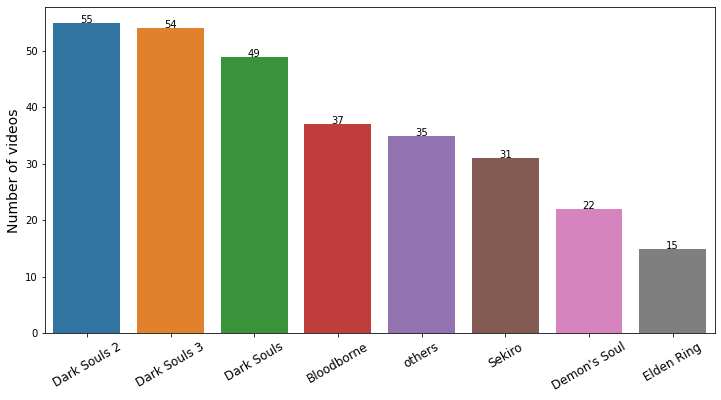

In [19]:
f,a=plt.subplots(1,figsize=(12,6))
x_data=df['Game'].value_counts().keys()
y_data=df['Game'].value_counts()
sns.barplot(x=x_data,y=y_data)
plt.xticks(ticks=range(0,x_data.nunique()),rotation=30,fontsize=12)
for i in range(0,x_data.nunique()):
    plt.text(x=range(0,x_data.nunique())[i],y=y_data[i],s=y_data[i],ha='center')
plt.ylabel('Number of videos',fontsize=14)
plt.show()


Above chart shows number of videos uploaded per game. Very low numbers of videos for Elden Ring can is due to fact that the game has still to release and not much information about story is known

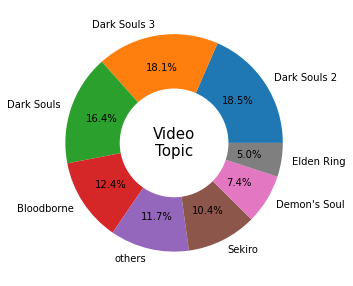

In [20]:
f,a=plt.subplots(1,figsize=(7,5))
plt.pie(x=y_data,labels=x_data,autopct='%.1f%%',pctdistance=0.7)
circle=plt.Circle(xy=(0,0),radius=0.5,fc='w')
plt.gca().add_artist(circle)
plt.text(x=0,y=0,s='Video\nTopic',ha='center',va='center',fontsize=15)
plt.show()

In [21]:
#channel statistics
total_views=df['views'].sum()
total_comments=df['comments'].sum()
total_ld_ratio=df['like'].sum()/df['dislike'].sum()


In [22]:
total_ld_ratio,total_views,total_comments

(65.78482977881141, 385252209, 760666)

### Top N number of Videos according to total views

In [23]:
# Set N to the number of videos

N=10

df_top=df.nlargest(N,['views']).reset_index()

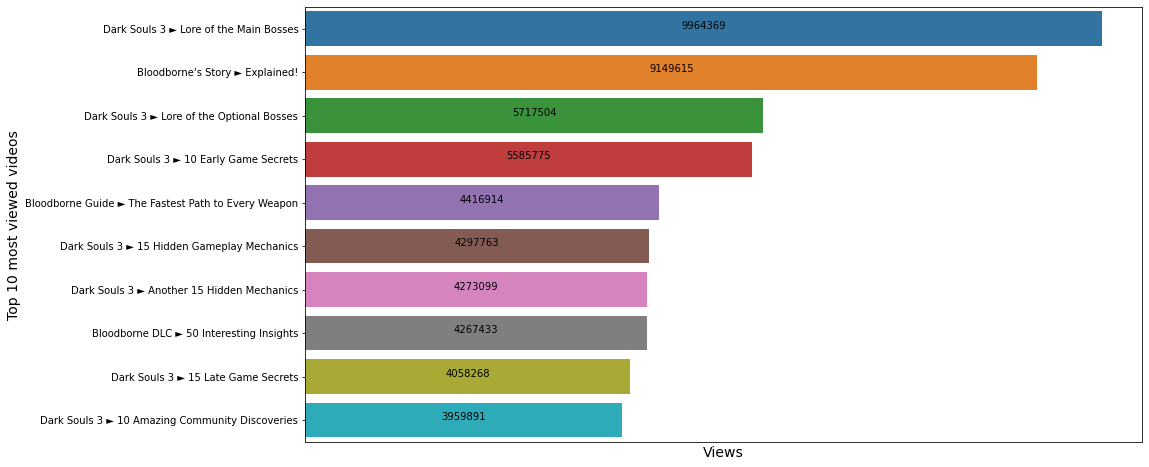

In [24]:
f,a=plt.subplots(1,figsize=(15,8))
x=df_top['views']
y=df_top['Title']
sns.barplot(x=x,y=y)
plt.xlabel('Views', fontsize=14)
plt.ylabel('Top {} most viewed videos'.format(N),fontsize=14)
plt.xticks([])
for i in range(0,N):
    plt.text(x=x[i]/2,y=range(0,N)[i],s='{}'.format(x[i]),ha='center')


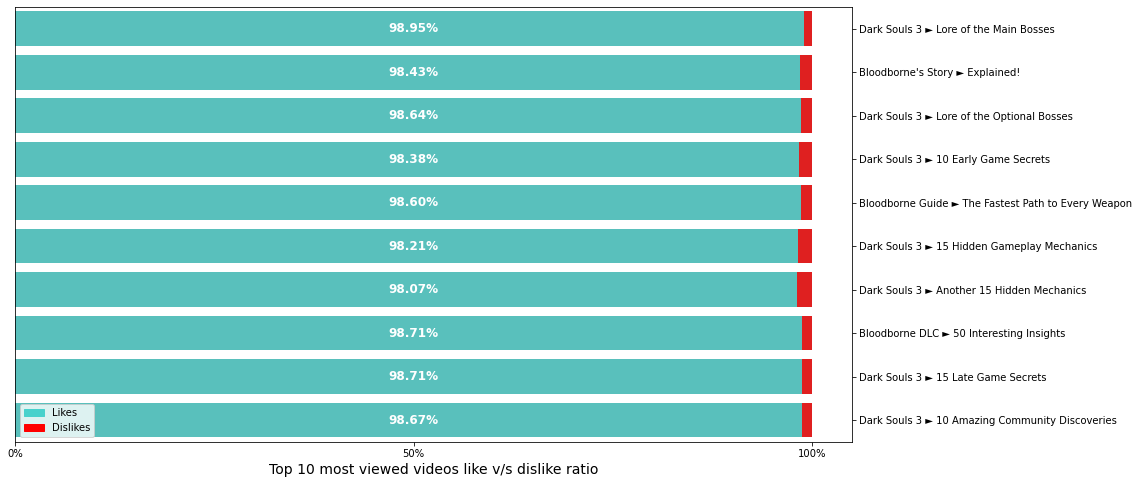

In [25]:
f,a=plt.subplots(1,figsize=(15,8))
x=(df_top['like']/(df_top['like']+df_top['dislike'])*100)
y=df_top['Title']
x2=[100]*N
sns.barplot(x=x2,y=y,color='red')
sns.barplot(x=x,y=y,color='mediumturquoise')
plt.ylabel('')
plt.xticks([0,50,100],labels=('0%','50%','100%'))

patch1 = mpatches.Patch(color='red', label='Dislikes')
patch2 = mpatches.Patch(color='mediumturquoise', label='Likes')
plt.legend(handles=[patch2,patch1],loc='lower left')

plt.xlabel('Top {} most viewed videos like v/s dislike ratio'.format(N),fontsize=14)
for i in range(0,N):
    plt.text(x=x2[i]/2,y=range(0,N)[i],s='{:.2f}%'.format(x[i]),ha='center',va='center',color='w',fontsize=12,weight='bold')
a.yaxis.tick_right()

### Channel Statistics:

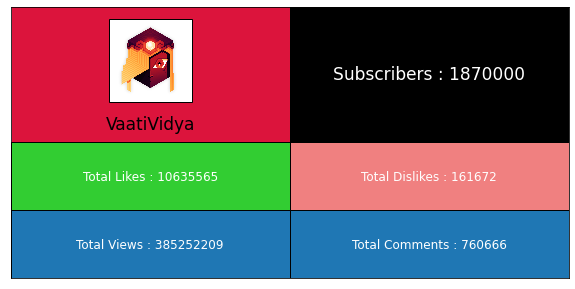

In [26]:
#getting subscriber count
res=youtube.channels().list(part='statistics',id=channel_id).execute()
sub_count=res['items'][0]['statistics']['subscriberCount']

f,a=plt.subplots(1,figsize=(10,5))

Channel=plt.Rectangle(xy=(0,0.5),width=0.5,height=0.5,edgecolor='w',linewidth=1,facecolor='crimson')
Sub_count=plt.Rectangle(xy=(0.5,0.5),width=0.5,height=0.5,edgecolor='black',linewidth=1,facecolor='black')
Total_views=plt.Rectangle(xy=(0,0),width=0.5,height=0.25,edgecolor='black',linewidth=1)
Total_comm=plt.Rectangle(xy=(0.5,0),width=0.5,height=0.25,edgecolor='black',linewidth=1)
Total_likes=plt.Rectangle(xy=(0,0.25),width=0.5,height=0.25,edgecolor='black',linewidth=1,facecolor='limegreen')
Total_dislikes=plt.Rectangle(xy=(0.5,0.25),width=0.5,height=0.25,edgecolor='black',linewidth=1,facecolor='lightcoral')

image=imread('vaati.png')
imbox=OffsetImage(arr=image,zoom=0.15)
logo=AnnotationBbox(offsetbox=imbox,xy=(0.25,0.8))

plt.gca().add_artist(Channel)
plt.gca().add_artist(Total_likes)
plt.gca().add_artist(Total_dislikes)
plt.gca().add_artist(Sub_count)
plt.gca().add_artist(Total_views)
plt.gca().add_artist(Total_comm)
plt.gca().add_artist(logo)

plt.text(x=0.25,y=0.55,s='VaatiVidya',ha='center',fontsize=17)
plt.text(x=0.75,y=0.75,s='Subscribers : {}'.format(sub_count),ha='center',va='center',fontsize=17,color='w')
plt.text(x=0.25,y=0.375,s='Total Likes : {}'.format(df['like'].sum()),ha='center',va='center',fontsize=12,color='w')
plt.text(x=0.75,y=0.375,s='Total Dislikes : {}'.format(df['dislike'].sum()),ha='center',va='center',fontsize=12,color='w')
plt.text(x=0.25,y=0.125,s='Total Views : {}'.format(df['views'].sum()),ha='center',va='center',fontsize=12,color='w')
plt.text(x=0.75,y=0.125,s='Total Comments : {}'.format(df['comments'].sum()),ha='center',va='center',fontsize=12,color='w')

plt.xticks([])
plt.yticks([])
plt.show()